### __Imports and installs__

In [1]:
from pathlib import Path
import subprocess
from tqdm import tqdm
import os

import torch
from torch.utils.data import DataLoader

from utils_dataset import CustomImageDataset, deprocess_image, load_labels
from utils_plot import show_images, show_one_image, show_cams, show_one_cam, show_centers
from utils_cam import generate_cams
from utils_models import load_model, evaluate_model_accuracy, evaluate_cross_model_accuracy
from utils_adversarial import APD, save_adversarial_images

import pandas as pd


In [2]:
batch_size = 24
num_workers = 4

gpu_id = 0
device = torch.device(f"cuda:{gpu_id}" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### __Dataset__

In [3]:
models = []

resnet101 = load_model("resnet101")
models.append(resnet101)
inception_v3 = load_model("inception_v3")
models.append(inception_v3)
inception_v4 = load_model("inception_v4")
models.append(inception_v4)
adv_inception_v3 = load_model("adv_inception_v3")
models.append(adv_inception_v3)
inception_resnet_v2 = load_model("inception_resnet_v2")
models.append(inception_resnet_v2)


Loading model 'resnet101' from Model/resnet101.pth
Loading model 'inception_v3' from Model/inception_v3.pth
Loading model 'inception_v4' from Model/inception_v4.pth
Loading model 'adv_inception_v3' from Model/adv_inception_v3.pth
Loading model 'inception_resnet_v2' from Model/inception_resnet_v2.pth


In [4]:
images_folder_path = Path('tf_to_pytorch_model/dataset/images')
label_file_path = Path('tf_to_pytorch_model/dataset/dev_dataset.csv')

# Check if the images folder exists; if not, clone the repository
if not images_folder_path.exists():
    repo_url = 'https://github.com/ylhz/tf_to_pytorch_model.git'
    try:
        subprocess.run(["git", "clone", repo_url], check=True)
        print(f"Repository cloned successfully.")
    except subprocess.CalledProcessError as e:
        print(f"Failed to clone repository: {e}")


In [5]:
labels_dict = load_labels()

dataset = CustomImageDataset(label_file_path, images_folder_path)

dataloader = DataLoader(dataset, batch_size=batch_size, num_workers=num_workers)


Loading labels from imagenet_class_index.json


In [6]:
# for model in models:
#     evaluate_model_accuracy(model, dataloader, device)

### __Class Activation Maps__

In [7]:
# Show some images from the dataset

data_iter = iter(dataloader)
images, labels, _ = next(data_iter)

# show_images(images, labels, labels_dict, rows=2)

In [8]:
# Show grad cams for some images for each model

# for model in models:
#     model.to(device)
#     show_cams(model, images, labels, labels_dict, rows=2, image_weight=0.7)
#     model.to('cpu')


In [9]:
# idx = 17
# for model in models:
#     print(model.name)
#     show_one_cam(model, images[idx], labels[idx], image_weight=0.7)

# show_one_image(images[idx])

### __Local Maxima__

In [10]:
images, labels, _ = next(iter(dataloader))

# for model in models:
#     show_centers(model, images, labels)

### __Main algorithm__

#### Example use

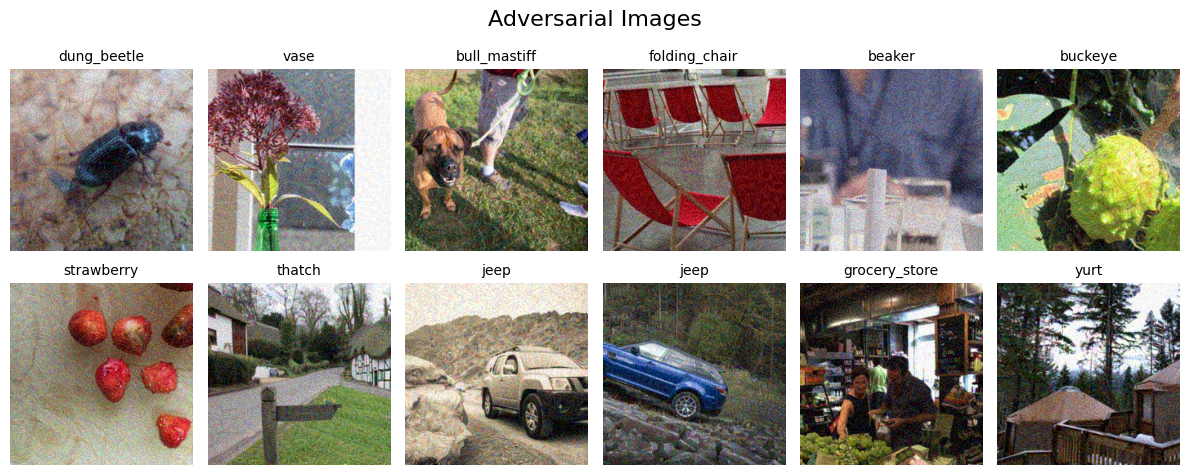

In [11]:
images, labels, _ = next(iter(dataloader))
model = resnet101

model.to(device)
x_adv = APD(images, labels, model)
model.to('cpu')

x_adv_dep = deprocess_image(x_adv)

show_images(x_adv_dep, labels, labels_dict, title="Adversarial Images")

In [12]:
for model in models:
    save_adversarial_images(dataloader, model, device=device, save_dir=f"{model.name}_apd")

Directory 'Generated/resnet101_apd' already exists. Skipping adversarial image generation and saving.
Directory 'Generated/inception_v3_apd' already exists. Skipping adversarial image generation and saving.
Directory 'Generated/inception_v4_apd' already exists. Skipping adversarial image generation and saving.
Directory 'Generated/adv_inception_v3_apd' already exists. Skipping adversarial image generation and saving.
Directory 'Generated/inception_resnet_v2_apd' already exists. Skipping adversarial image generation and saving.


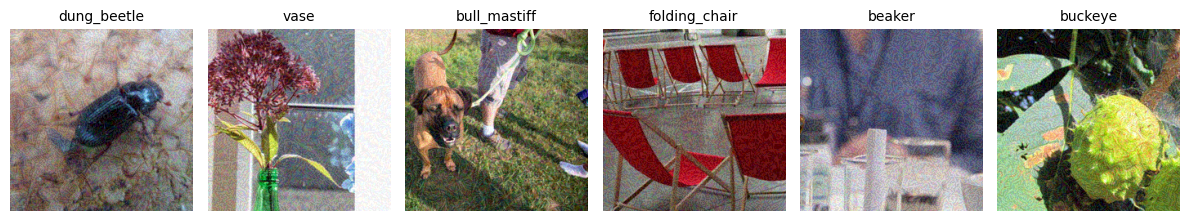

Attacking resnet101 with resnet101


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 30.94it/s]


Accuracy of resnet101: 0.3%
Attacking inception_v3 with resnet101


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 22.65it/s]


Accuracy of inception_v3: 39.6%
Attacking inception_v4 with resnet101


Evaluating: 100%|██████████| 42/42 [00:02<00:00, 16.41it/s]


Accuracy of inception_v4: 41.9%
Attacking adv_inception_v3 with resnet101


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 23.64it/s]


Accuracy of adv_inception_v3: 56.2%
Attacking inception_resnet_v2 with resnet101


Evaluating: 100%|██████████| 42/42 [00:02<00:00, 14.45it/s]


Accuracy of inception_resnet_v2: 48.8%


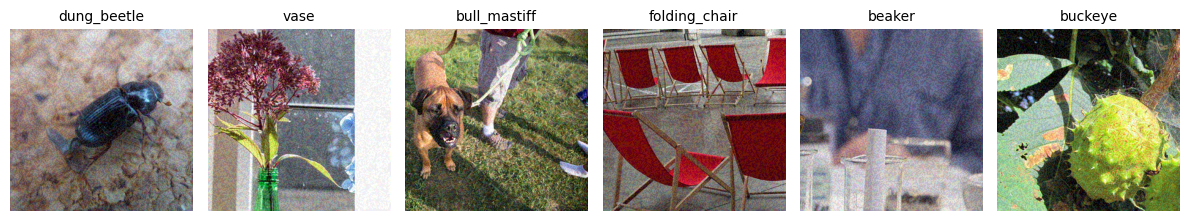

Attacking resnet101 with inception_v3


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 25.39it/s]

Accuracy of resnet101: 82.9%
Attacking inception_v3 with inception_v3


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 25.73it/s]


Accuracy of inception_v3: 1.7%
Attacking inception_v4 with inception_v3


Evaluating: 100%|██████████| 42/42 [00:02<00:00, 19.13it/s]


Accuracy of inception_v4: 61.8%
Attacking adv_inception_v3 with inception_v3


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 21.28it/s]


Accuracy of adv_inception_v3: 64.4%
Attacking inception_resnet_v2 with inception_v3


Evaluating: 100%|██████████| 42/42 [00:02<00:00, 16.14it/s]


Accuracy of inception_resnet_v2: 67.5%


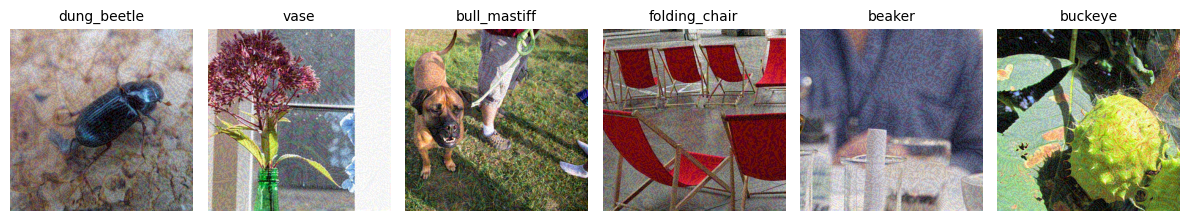

Attacking resnet101 with inception_v4


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 24.82it/s]


Accuracy of resnet101: 65.4%
Attacking inception_v3 with inception_v4


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 25.63it/s]


Accuracy of inception_v3: 36.2%
Attacking inception_v4 with inception_v4


Evaluating: 100%|██████████| 42/42 [00:02<00:00, 18.90it/s]


Accuracy of inception_v4: 0.0%
Attacking adv_inception_v3 with inception_v4


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 21.66it/s]


Accuracy of adv_inception_v3: 60.7%
Attacking inception_resnet_v2 with inception_v4


Evaluating: 100%|██████████| 42/42 [00:02<00:00, 16.15it/s]


Accuracy of inception_resnet_v2: 46.4%


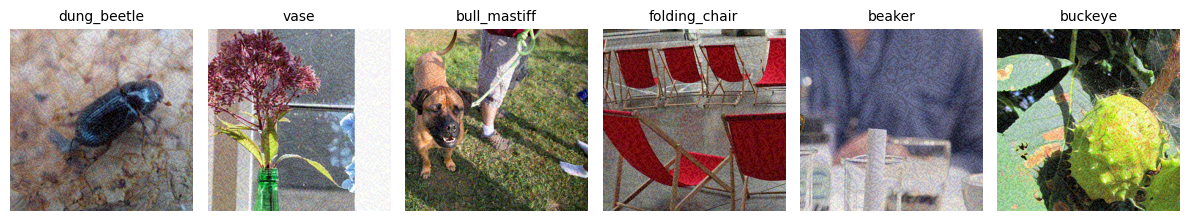

Attacking resnet101 with inception_resnet_v2


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 22.56it/s]


Accuracy of resnet101: 61.3%
Attacking inception_v3 with inception_resnet_v2


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 23.81it/s]


Accuracy of inception_v3: 35.3%
Attacking inception_v4 with inception_resnet_v2


Evaluating: 100%|██████████| 42/42 [00:02<00:00, 19.65it/s]


Accuracy of inception_v4: 36.0%
Attacking adv_inception_v3 with inception_resnet_v2


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 23.54it/s]


Accuracy of adv_inception_v3: 55.0%
Attacking inception_resnet_v2 with inception_resnet_v2


Evaluating: 100%|██████████| 42/42 [00:02<00:00, 15.69it/s]


Accuracy of inception_resnet_v2: 0.1%


In [13]:
for model in (m for m in models if m.name != "adv_inception_v3"):
    images_folder_path = os.path.join("Generated", f"{model.name}_apd")
    dataset = CustomImageDataset(label_file_path, images_folder_path)
    dataloader = DataLoader(dataset, batch_size=batch_size, num_workers=num_workers)
    data_iter = iter(dataloader)
    images, labels, _ = next(data_iter)
    show_images(images, labels, labels_dict, rows=1)
    for model_target in models:
        print(f"Attacking {model_target.name} with {model.name}")
        evaluate_model_accuracy(model_target, dataloader, device)



In [14]:
df_pivot = evaluate_cross_model_accuracy(models, label_file_path, batch_size, num_workers, device, "_apd")

print(df_pivot)
df_pivot.to_csv("model_accuracies.csv")

Attacking resnet101 with resnet101


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 27.36it/s]


Accuracy of resnet101: 0.3%
Attacking inception_v3 with resnet101


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 24.02it/s]


Accuracy of inception_v3: 39.6%
Attacking inception_v4 with resnet101


Evaluating: 100%|██████████| 42/42 [00:02<00:00, 18.68it/s]


Accuracy of inception_v4: 41.9%
Attacking adv_inception_v3 with resnet101


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 22.77it/s]


Accuracy of adv_inception_v3: 56.2%
Attacking inception_resnet_v2 with resnet101


Evaluating: 100%|██████████| 42/42 [00:02<00:00, 14.96it/s]


Accuracy of inception_resnet_v2: 48.8%
Attacking resnet101 with inception_v3


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 23.38it/s]


Accuracy of resnet101: 82.9%
Attacking inception_v3 with inception_v3


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 25.91it/s]


Accuracy of inception_v3: 1.7%
Attacking inception_v4 with inception_v3


Evaluating: 100%|██████████| 42/42 [00:02<00:00, 19.99it/s]


Accuracy of inception_v4: 61.8%
Attacking adv_inception_v3 with inception_v3


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 25.13it/s]


Accuracy of adv_inception_v3: 64.4%
Attacking inception_resnet_v2 with inception_v3


Evaluating: 100%|██████████| 42/42 [00:02<00:00, 16.09it/s]


Accuracy of inception_resnet_v2: 67.5%
Attacking resnet101 with inception_v4


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 24.02it/s]


Accuracy of resnet101: 65.4%
Attacking inception_v3 with inception_v4


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 23.48it/s]


Accuracy of inception_v3: 36.2%
Attacking inception_v4 with inception_v4


Evaluating: 100%|██████████| 42/42 [00:02<00:00, 19.53it/s]


Accuracy of inception_v4: 0.0%
Attacking adv_inception_v3 with inception_v4


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 24.26it/s]


Accuracy of adv_inception_v3: 60.7%
Attacking inception_resnet_v2 with inception_v4


Evaluating: 100%|██████████| 42/42 [00:02<00:00, 16.45it/s]


Accuracy of inception_resnet_v2: 46.4%
Attacking resnet101 with inception_resnet_v2


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 24.01it/s]


Accuracy of resnet101: 61.3%
Attacking inception_v3 with inception_resnet_v2


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 23.11it/s]


Accuracy of inception_v3: 35.3%
Attacking inception_v4 with inception_resnet_v2


Evaluating: 100%|██████████| 42/42 [00:02<00:00, 19.85it/s]


Accuracy of inception_v4: 36.0%
Attacking adv_inception_v3 with inception_resnet_v2


Evaluating: 100%|██████████| 42/42 [00:01<00:00, 24.97it/s]


Accuracy of adv_inception_v3: 55.0%
Attacking inception_resnet_v2 with inception_resnet_v2


Evaluating:  69%|██████▉   | 29/42 [00:01<00:00, 20.51it/s]

Evaluating: 100%|██████████| 42/42 [00:02<00:00, 15.84it/s]


Accuracy of inception_resnet_v2: 0.1%


TypeError: pivot() takes 1 positional argument but 4 were given

In [ ]:
for model in models:
    save_adversarial_images(dataloader, model, device=device, save_dir=f"{model.name}_mfgsm", attack_method="MFGSM")

TODO : clamp avec bonnes valeurs et adapter eps en conséquence (done!);, Essayer moyenner x_adv sur différents modèles !!
IDEES AMELIO : rescale dans algo (done), gradCAM (RDFIA) en + de gradCAM++ (done); threshold au lieu de région carrée pour régions dropout (done), tester en mettant le gradient à 0 dans les régions dropped out (done)